# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Jaya Srinivas

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
%pip install spacy

%pip install spacytextblob

%pip install matplotlib


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ ------------
annotated-types    0.7.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               1.0.1
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.20.0
comm               0.2.2
confection         0.1.5
contourpy          1.2.0
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.2
decorator          5.1.1
en_core_web_sm     3.8.0
executing          2.0.1
fonttools          4.47.2
idna               3.6
ipykernel          6.29.5
ipython            8.26.0
jedi               0.19.1
Jinja2             3.1.4
joblib             1.3.2
jupyter_client     8.6.2
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.4.1
language_data      1.2.0
marisa-trie        1.2.1
markdown-it-py     3.0.0
MarkupSafe         3.0.2
matplotlib         3.8.2
matplotlib-inline  0.1.7
mdurl              0.1.2
murmurh

# Question1 
Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [3]:
import requests
import pickle


url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# use requests to get html content
response = requests.get(url)
html_content = response.text

# Define pkl file name
new_file = "Article.pkl"

# Save HTML to a pickle file
with open(new_file, "wb") as file:
    pickle.dump(html_content, file)

print(f"HTML content saved to {new_file}")

HTML content saved to Article.pkl


# Question2 
Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [4]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the pickle file
with open(new_file, "rb") as file:
    loaded_html = pickle.load(file)

# Use BeautifulSoup to parse the HTML content
soup = BeautifulSoup(loaded_html, "html.parser")

# Extract and print the text content of the article
article_text = soup.get_text()

# Print the first 500 characters of the extracted text
print(article_text[:500])  # Print a preview of the first 500 characters

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.


# Question3
 Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [ ]:
# Attemtping to hard install spacy due to issues when installing in environment
!python3 -m spacy download en_core_web_sm
%pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.6.0/en_core_web_sm-3.6.0.tar.gz
!python3 -m spacy validate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 42.5 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.1 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 20.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.4/776.4 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.6 MB/s eta

In [11]:
import pickle
import spacy
from collections import Counter

# Load the HTML content from the pickle file
with open(new_file, "rb") as file:
    loaded_html = pickle.load(file)

# Use BeautifulSoup to parse the HTML content and get text
from bs4 import BeautifulSoup
soup = BeautifulSoup(loaded_html, "html.parser")
article_text = soup.get_text()

# Load spaCy's language model (you can use 'en_core_web_sm')
nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy
doc = nlp(article_text)

# Filter out unwanted tokens: punctuation, stopwords, and whitespace
filtered_tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the frequency of each token
token_counts = Counter(filtered_tokens)

# Get the 5 most common tokens
common_tokens = token_counts.most_common(5)

# Print the common tokens with their frequencies
print("Most frequent tokens (after filtering):")
for token, freq in common_tokens:
    print(f"Token: {token}, Frequency: {freq}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.8.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Most frequent tokens (after filtering):
Token: comment, Frequency: 136
Token: march, Frequency: 133
Token: 2021, Frequency: 133
Token: says, Frequency: 132
Token: report, Frequency: 130


# Question4
 Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [13]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the HTML content from the .pkl file
with open(new_file, "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content by targeting a specific tag
article_div = soup.find('div', class_='entry-content')  
if article_div:
    article_text = article_div.get_text(strip=True)
else:
    article_text = ""
    print("Could not find the article content.")

# Load the spaCy language model (English)
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Filter tokens: exclude stopwords, punctuation, and whitespace, and use lemmas
lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequencies of the lemmas
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print the results
print("Top 5 most frequent lemmas in the article (excluding punctuation, stopwords, and whitespace):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.8.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Top 5 most frequent lemmas in the article (excluding punctuation, stopwords, and whitespace):
Lemma: 'laser', Frequency: 33
Lemma: 'headlight', Frequency: 25
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'light', Frequency: 9


# Question5
Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [14]:
import pickle
from bs4 import BeautifulSoup
import spacy

# Load the HTML content from the .pkl file
with open(new_file, "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content by targeting a specific class
article_div = soup.find('div', class_='entry-content')  # Adjust based on the actual structure
if article_div:
    article_text = article_div.get_text(strip=True)
else:
    article_text = ""
    print("Could not find the article content.")

# Load the spaCy language model (English)
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Define the scoring methods
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Calculate the score of a sentence by tokens.
    :param sentence: The sentence to score.
    :param interesting_tokens: List of interesting tokens.
    :return: The score of the sentence.
    """
    tokens = [token.text.lower() for token in sentence if not token.is_stop and not token.is_punct]
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens) if tokens else 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Calculate the score of a sentence by lemmas.
    :param sentence: The sentence to score.
    :param interesting_lemmas: List of interesting lemmas.
    :return: The score of the sentence.
    """
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct]
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas) if lemmas else 0

# Use the frequent Tokens/lemmas identified in the previous steps
interesting_tokens = ['laser','headlights','technology','led','headlight']
interesting_lemmas = ['laser','headlight','beam','technology','led']

# Process the first sentence
first_sentence = list(doc.sents)[0]

# Calculate scores for the first sentence
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print the results
print(f"First Sentence: {first_sentence.text}")
print(f"Token Score: {token_score}")
print(f"Lemma Score: {lemma_score}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.8.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


First Sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Token Score: 0.2
Lemma Score: 0.2


# Question6
 Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

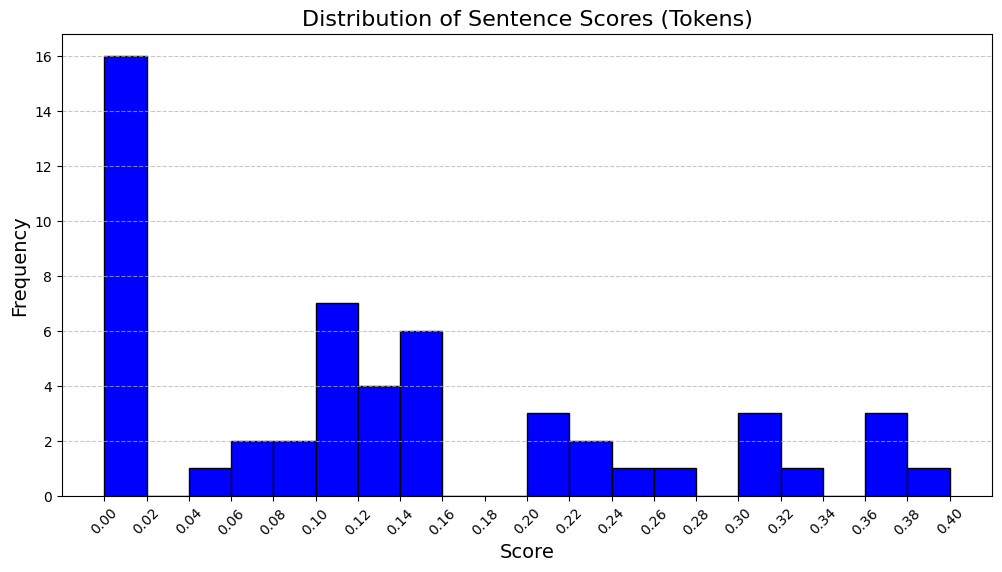

In [16]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Load the HTML content from the .pkl file
with open(new_file, "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content by targeting a specific class
article_div = soup.find('div', class_='entry-content')  # Adjust based on the actual structure
if article_div:
    article_text = article_div.get_text(strip=True)
else:
    article_text = ""
    print("Could not find the article content.")

# Load the spaCy language model (English)
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Define the scoring method
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Calculate the score of a sentence by tokens.
    :param sentence: The sentence to score.
    :param interesting_tokens: List of interesting tokens.
    :return: The score of the sentence.
    """
    tokens = [token.text.lower() for token in sentence if not token.is_stop and not token.is_punct]
    count = sum(1 for token in tokens if token in interesting_tokens)
    return count / len(tokens) if tokens else 0

# Interesting tokens for scoring
interesting_tokens = ['laser','headlights','technology','led','headlight']

# Calculate scores for every sentence
scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in doc.sents]

# Define bin edges from scores with intervals of 0.02
bin_edges = np.arange(0, max(scores) + 0.02, 0.02)

# Plot the histogram
plt.figure(figsize=(12, 6))  # Make the histogram wider
plt.hist(scores, bins=bin_edges, color='blue', edgecolor='black')
plt.title('Distribution of Sentence Scores (Tokens)', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(bin_edges, rotation=45)  # Set x-ticks to match bin intervals
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Observation Comment: The most common range of scores appears to be between 0.00 and 0.02.
# Indicating that most sentences in the article have few mentions of the interesting tokens relative to their total length.

# Question 7
 Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.8.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


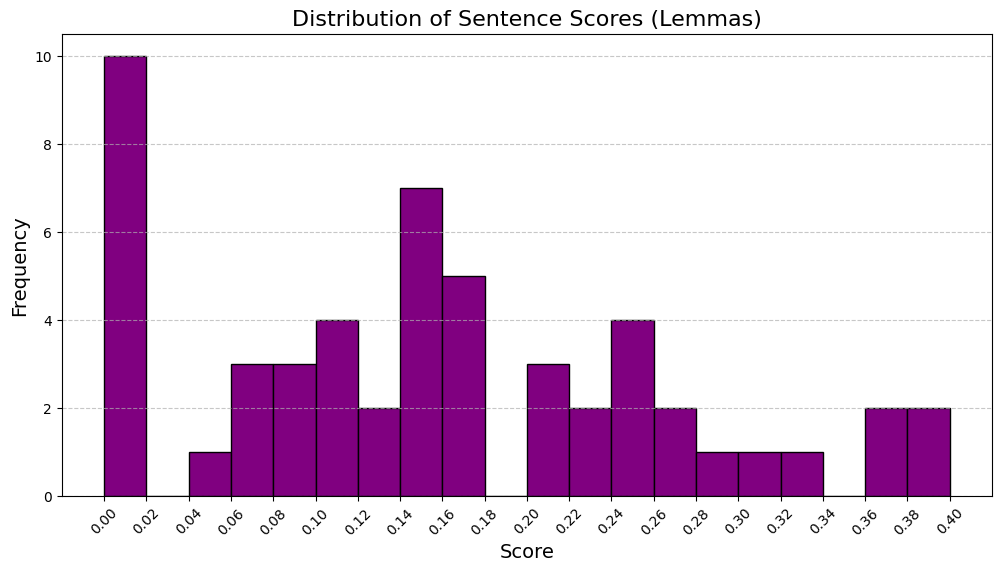

In [17]:
import pickle
from bs4 import BeautifulSoup
import spacy
import matplotlib.pyplot as plt
import numpy as np

# Load the HTML content from the .pkl file
with open(new_file, "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract the article content by targeting a specific tag/class
article_div = soup.find('div', class_='entry-content')  # Adjust based on the actual structure
if article_div:
    article_text = article_div.get_text(strip=True)
else:
    article_text = ""
    print("Could not find the article content.")

# Load the spaCy language model (English)
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Define the scoring method using lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Calculate the score of a sentence by lemmas.
    :param sentence: The sentence to score.
    :param interesting_lemmas: List of interesting lemmas.
    :return: The score of the sentence.
    """
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_stop and not token.is_punct]
    count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return count / len(lemmas) if lemmas else 0

# Interesting lemmas for scoring
interesting_lemmas = ['laser', 'headlight', 'beam', 'technology', 'led']

# Calculate scores for every sentence
scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in doc.sents]

# Define bin edges from scores with intervals of 0.02
bin_edges = np.arange(0, max(scores) + 0.02, 0.02)

# Plot the histogram
plt.figure(figsize=(12, 6))  # Make the histogram wider
plt.hist(scores, bins=bin_edges, color='purple', edgecolor='black')
plt.title('Distribution of Sentence Scores (Lemmas)', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(bin_edges, rotation=45)  # Set x-ticks to match bin intervals
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Observation Comment: The most common range of scores appears to be between 0.0 and 0.2.
# Indicating that most sentences in the article have few mentions of the interesting lemmas relative to their total length.

# Question 8
 Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

If we were only to consider nouns within our interesting words, a word that would be discounted would be - 'led'.


Here is how we could change our code to only look at nouns:

Orginal code - 
tokens = [ token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space ]

Updated code - 
tokens = [ token.text.lower() for token in doc if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct ]


In [18]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 455197 bytes to web-scraping.html
